#**Importing**

##**Importing the necessary libraries for analysis**

In [1]:
import gdown
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from pickle import FALSE
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             precision_recall_curve,
                             auc)
import tensorflow as tf
from tensorflow.keras import layers, callbacks
import gc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
import lightgbm as lgb
from imblearn.combine import SMOTEENN

##**Data Visualization libraries**

In [2]:
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

##**Imporing libraries to avoid warnings**

In [3]:
import warnings

In [4]:
import torch

print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Device Count:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("CUDA Version:", torch.version.cuda)
else:
    print("CUDA is NOT available. Check your installation.")

device = torch.device("cuda")
x = torch.tensor([1.0, 2.0, 3.0], device=device)
print("Tensor on GPU:", x)

# Perform a GPU computation
y = x * 2
print("Computation on GPU:", y)

print(torch.backends.cudnn.enabled)
print(torch.backends.cudnn.version())
print(torch.backends.cuda.is_built())

PyTorch Version: 2.6.0+cu124
CUDA Available: True
CUDA Device Count: 1
GPU Name: Tesla T4
CUDA Version: 12.4
Tensor on GPU: tensor([1., 2., 3.], device='cuda:0')
Computation on GPU: tensor([2., 4., 6.], device='cuda:0')
True
90300
True


#**Importing Data File**

In [ ]:
file_id = "1eMlZ-I5yF8rMqWNCE6y2ZxuUy-b6eivS"
url = f"https://drive.google.com/uc?id={file_id}"
output = "/content/sample_data/Card.csv"
gdown.download(url, output, quiet=False)

file_id = "1T225BGU3j1aNHp7d2tsJaDp34NzY74To"
url = f"https://drive.google.com/uc?id={file_id}"
output = "/content/sample_data/UserData.csv"
gdown.download(url, output, quiet=False)

file_id = "1qf9-l57NYBYLVFoJn3dT3DdhxyWeq8Yx"
url = f"https://drive.google.com/uc?id={file_id}"
output = "/content/sample_data/Transaction.csv"
gdown.download(url, output, quiet=False)

file_id = "1RdCdewzZCEyauQ4G5ErAJfr2xr2AW1-J"
url = f"https://drive.google.com/uc?id={file_id}"
output = "/content/sample_data/Labels.json"
gdown.download(url, output, quiet=False)

file_id = "1Tn4js5FiuVEb-9CQLaJjKqeuOcnUjB-m"
url = f"https://drive.google.com/uc?id={file_id}"
output = "/content/sample_data/Codes.json"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1eMlZ-I5yF8rMqWNCE6y2ZxuUy-b6eivS
To: /content/sample_data/Card.csv
100%|██████████| 510k/510k [00:00<00:00, 109MB/s]
Downloading...
From: https://drive.google.com/uc?id=1T225BGU3j1aNHp7d2tsJaDp34NzY74To
To: /content/sample_data/UserData.csv
100%|██████████| 165k/165k [00:00<00:00, 81.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1qf9-l57NYBYLVFoJn3dT3DdhxyWeq8Yx
From (redirected): https://drive.google.com/uc?id=1qf9-l57NYBYLVFoJn3dT3DdhxyWeq8Yx&confirm=t&uuid=239ef4f4-3a80-45da-8dd6-54d2dc29f1bc
To: /content/sample_data/Transaction.csv
100%|██████████| 1.26G/1.26G [00:10<00:00, 120MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1RdCdewzZCEyauQ4G5ErAJfr2xr2AW1-J
From (redirected): https://drive.google.com/uc?id=1RdCdewzZCEyauQ4G5ErAJfr2xr2AW1-J&confirm=t&uuid=c61f89ec-01a1-47b1-a281-f1dd88dea3ee
To: /content/sample_data/Labels.json
100%|██████████| 159M/159M [00:03<00:00, 48.8MB/s]
Download

'/content/sample_data/Codes.json'

#**Importing Dataset**

##**Applying the important settings**

In [ ]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

##**Importing CSV**

In [ ]:
card = pd.read_csv('/content/sample_data/Card.csv')
trans = pd.read_csv('/content/sample_data/Transaction.csv')
users = pd.read_csv('/content/sample_data/UserData.csv')

##**Reading the JSON files**

In [ ]:
with open('/content/sample_data/Codes.json', 'r') as file:
    codes = json.load(file)

with open('/content/sample_data/Labels.json', 'r') as file:
    fraud = json.load(file)


In [ ]:
fraud_id = list(fraud['target'].keys())
fraud_status = list(fraud['target'].values())

df1 = pd.DataFrame({"id": fraud_id, 'Status': fraud_status})
df1.head(3)


,id,Status
0,10649266,No
1,23410063,No
2,9316588,No


In [ ]:
code = list(codes.keys())
name = list(codes.values())

df2 = pd.DataFrame({'mcc': code, 'Name': name})
df2.head(3)

,mcc,Name
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"


In [ ]:
card.head(3)


,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No


In [ ]:
card.shape

(6146, 13)

#**Checking for any duplicated or missing values**

In [ ]:
print("Total Duplicated values found: ", card.duplicated().sum())

print("Count of null values in each column are as follows: \n", card.isnull().sum())

Total Duplicated values found:  0
Count of null values in each column are as follows: 
 id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64


#**Checking if correct datatypes are assigned to the columns**

In [ ]:
nuuniq = []
dtyp = []
uuniq = []

for col in card.columns:
    nuuniq.append(card[col].nunique())
    dtyp.append(card[col].dtype)
    uuniq.append(card[col].unique()[0])

result = pd.DataFrame({"Column Name": card.columns, 'Count of Unique values': nuuniq, 'Assigned Datatype': dtyp, 'Value': uuniq})
result

,Column Name,Count of Unique values,Assigned Datatype,Value
0,id,6146,int64,4524
1,client_id,2000,int64,825
2,card_brand,4,object,Visa
3,card_type,3,object,Debit
4,card_number,6146,int64,4344676511950444
5,expires,259,object,12/2022
6,cvv,998,int64,623
7,has_chip,2,object,YES
8,num_cards_issued,3,int64,2
9,credit_limit,3654,object,$24295


#**Fixing the issues found above.**

##**Converting the relevant columns to datetime**

In [ ]:
card['expires'] =pd.to_datetime(card['expires'])
card['acct_open_date'] = pd.to_datetime(card['acct_open_date'])

##**Fixing the datatype misassignment for 'credit_limit' column**

In [ ]:
card['credit_limit'] = card['credit_limit'].str.replace('$', '')
card['credit_limit'] = pd.to_numeric(card['credit_limit'])
card.rename(columns = {'credit_limit': 'Credit_Limit($)'})

##**Rechecking the datatypes**

In [ ]:
nuuniq = []
dtyp = []
uuniq = []

for col in card.columns:
    nuuniq.append(card[col].nunique())
    dtyp.append(card[col].dtype)
    uuniq.append(card[col].unique()[0])

result = pd.DataFrame({"Column Name": card.columns, 'Count of Unique values': nuuniq, 'Assigned Datatype': dtyp, 'Value': uuniq})
result

,Column Name,Count of Unique values,Assigned Datatype,Value
0,id,6146,int64,4524
1,client_id,2000,int64,825
2,card_brand,4,object,Visa
3,card_type,3,object,Debit
4,card_number,6146,int64,4344676511950444
5,expires,259,datetime64[ns],2022-12-01 00:00:00
6,cvv,998,int64,623
7,has_chip,2,object,YES
8,num_cards_issued,3,int64,2
9,credit_limit,3654,int64,24295


##**Checking if correct datatypes are assigned to the columns**

In [ ]:
users.head(3)
nuuniq = []
dtyp = []
uuniq = []

for col in users.columns:
    nuuniq.append(users[col].nunique())
    dtyp.append(users[col].dtype)
    uuniq.append(users[col].unique()[0])

result = pd.DataFrame({"Column Name": users.columns, 'Count of Unique values': nuuniq, 'Assigned Datatype': dtyp, 'Value': uuniq})
result


,Column Name,Count of Unique values,Assigned Datatype,Value
0,id,2000,int64,825
1,current_age,80,int64,53
2,retirement_age,29,int64,66
3,birth_year,80,int64,1966
4,birth_month,12,int64,11
5,gender,2,object,Female
6,address,1999,object,462 Rose Lane
7,latitude,989,float64,34.15
8,longitude,1224,float64,-117.76
9,per_capita_income,1754,object,$29278


##**Removing the '$' sign from the columns**

In [ ]:
users['per_capita_income'] = users['per_capita_income'].str.replace('$', '')
users['yearly_income'] = users['yearly_income'].str.replace('$', '')
users['total_debt'] = users['total_debt'].str.replace('$', '')

##**Changing their datatype to numeric**

In [ ]:
users['per_capita_income'] = pd.to_numeric(users['per_capita_income'])
users['yearly_income'] = pd.to_numeric(users['yearly_income'])
users['total_debt'] = pd.to_numeric(users['total_debt'])

##**Changing the names**

In [ ]:
users.rename(columns = {"per_capita_income": "per_capita_income($)", "yearly_income" : "yearly_income($)", "total_debt": "total_debt($)"}, inplace = True)

##**Verifying the changes**

In [ ]:
users.dtypes
users.isnull().sum()

,0
id,0
current_age,0
retirement_age,0
birth_year,0
birth_month,0
gender,0
address,0
latitude,0
longitude,0
per_capita_income($),0


In [ ]:
dfr = pd.merge(users, card, on = 'id', how = 'inner')
dfr.head(3)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income($),yearly_income($),total_debt($),credit_score,num_credit_cards,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,707,Visa,Debit,4468428983030588,2020-02-01,92,YES,1,1862,2020-01-01,2020,No
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5,262,Mastercard,Debit (Prepaid),5922455636977986,2021-09-01,516,YES,1,62,2020-02-01,2020,No
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5,1593,Mastercard,Debit,5846041795591669,2020-02-01,788,NO,2,13139,2020-02-01,2020,No


##**Checking the datatype of the column on which the merger will take place**

In [ ]:
df2.head(3)

df2['mcc'].dtype

df2['mcc'] = pd.to_numeric(df2['mcc'])

##**Checking for any missing values**

In [ ]:
df2.isnull().sum()

,0
mcc,0
Name,0


#**Understanding the data types**

In [ ]:
df1.head(3)

df1.shape

df1.isnull().sum()


df1.dtypes

df1['id'] = pd.to_numeric(df1['id'])

trans.head(3)



,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN


##**Understanding the datatype of the common column.**

In [ ]:

trans['id'].dtype

df = pd.merge(trans, df1, on='id', how='inner')
df.head(3)

df = pd.merge(df, df2, on = 'mcc', how = 'inner')
df.head(3)



,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,Status,Name
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,No,Miscellaneous Food Stores
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,No,Department Stores
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,No,Money Transfer


#**Cleaning**


In [ ]:
nuuniq = []
dtyp = []
uuniq = []

for col in df.columns:
    nuuniq.append(df[col].nunique())
    dtyp.append(df[col].dtype)
    uuniq.append(df[col].unique()[0])

result = pd.DataFrame({"Column Name": df.columns, 'Count of Unique values': nuuniq, 'Assigned Datatype': dtyp, 'Value': uuniq})
result

,Column Name,Count of Unique values,Assigned Datatype,Value
0,id,8914963,int64,7475327
1,date,3680988,object,2010-01-01 00:01:00
2,client_id,1219,int64,1556
3,card_id,4070,int64,2972
4,amount,70639,object,$-77.00
5,use_chip,3,object,Swipe Transaction
6,merchant_id,66537,int64,59935
7,merchant_city,12173,object,Beulah
8,merchant_state,199,object,ND
9,zip,24586,float64,58523.0


In [ ]:
df['amount'] = df['amount'].str.replace('$', '')
df['amount'] = pd.to_numeric(df['amount'])
df.rename(columns = {'amount': 'Amount($)'}, inplace = True)



In [ ]:
miss = []
rows = df.shape[0]
per = []

for col in df.columns:
    missing = df[col].isnull().sum()
    miss.append(missing)
    percent = ( missing / rows)*100
    per.append(percent)

res = pd.DataFrame({'Column Name': df.columns, 'Missing Values': miss, 'Percentage of null values': per})
res

,Column Name,Missing Values,Percentage of null values
0,id,0,0.000000
1,date,0,0.000000
2,client_id,0,0.000000
3,card_id,0,0.000000
4,Amount($),0,0.000000
5,use_chip,0,0.000000
6,merchant_id,0,0.000000
7,merchant_city,0,0.000000
8,merchant_state,1047865,11.754003
9,zip,1107377,12.421555


##**Handling error column**

,0
id,0
date,0
client_id,0
card_id,0
Amount($),0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,0
zip,0


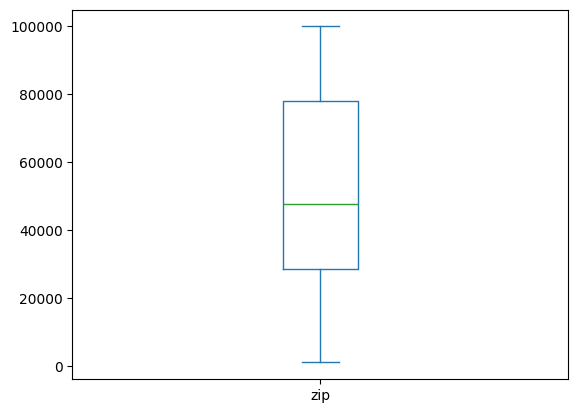

In [ ]:

df['errors'].unique()

df['errors'].fillna('Errorless', inplace = True)

df['merchant_state'].fillna(df['merchant_state'].mode()[0], inplace = True)

df['zip'].plot(kind = 'box')

df['zip'].fillna(df['zip'].mean(), inplace = True)

df.isnull().sum()




In [ ]:
amt = df['Amount($)'].sort_values(ascending = True)
amt

,Amount($)
7272915,-500.00
5075764,-500.00
2457801,-500.00
1195046,-500.00
539453,-500.00
...,...
186889,4978.45
7098274,5155.36
8168666,5591.73
4230064,5696.78


In [ ]:
amt_below = df[df['Amount($)'] <= 0]
amt_below.shape

(449972, 14)

In [ ]:
amount = df['Amount($)']
payment_status = []

for val in amount:
    if val < 0:
        payment_status.append('Debit')
    else:
        payment_status.append('Credit')

df['Payment_Type'] = payment_status

##**Improve readability**

In [ ]:
df.columns


df.rename(columns = {"id": "ID", 'date': 'Date', 'client_id': 'CID', 'Amount($)': 'Amount', 'use_chip': 'UseChip', 'merchant_id': 'MID', 'merchant_city': 'MCity', 'merchant_state': 'MState', 'zip': 'Pincode', 'mcc': 'MCC', 'errors': 'Error', 'Status': 'Fraud_Status', 'Name': 'Category'}, inplace = True)


###**Set random seeds for reproducibility**

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
df = df.drop(['ID', 'CID', 'card_id', 'MID'], axis=1)

###**Convert datetime features**

In [ ]:
df.to_csv('/content/sample_data/CleanedData.csv', index=False)

In [6]:
#Used to handle the limitations of colab. Can be avoided when running on a system with better performance
file_id = "1IPuwk1IgOiFbWdrU8mbNoKXZvcIbzNzv"
url = f"https://drive.google.com/uc?id={file_id}"
output = "/content/sample_data/CleanedData.csv"
gdown.download(url, output, quiet=False)

df = pd.read_csv('/content/sample_data/CleanedData.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek
df = df.drop('Date', axis=1)



Downloading...
From (original): https://drive.google.com/uc?id=1IPuwk1IgOiFbWdrU8mbNoKXZvcIbzNzv
From (redirected): https://drive.google.com/uc?id=1IPuwk1IgOiFbWdrU8mbNoKXZvcIbzNzv&confirm=t&uuid=82970f3b-c658-4483-b18f-14a06fea8962
To: /content/sample_data/CleanedData.csv
100%|██████████| 1.03G/1.03G [00:14<00:00, 71.1MB/s]


#**Encoding**

##**Load data**

In [7]:
data = df

##**Handling missing values**

In [8]:
data.fillna({"Pincode": data["Pincode"].median()}, inplace=True)

##**Encoding categorical variables**

In [9]:
label_encoders = {}
categorical_cols = ["UseChip", "MCity", "MState", "Category", "Payment_Type", "Error"]
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

##**Define features and target**

In [10]:
X = data.drop(columns=["Fraud_Status"])
y = data["Fraud_Status"].apply(lambda x: 1 if x == "Yes" else 0)  # Convert target to binary

#**Class imbalance with SMOTE**

##**Handle class imbalance with SMOTE**

In [14]:
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


##**Split into train and test sets**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

##**Feature scaling**

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**Train XGBoost model**

In [17]:
model = xgb.XGBClassifier(scale_pos_weight=(1/0.01), use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:52:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

###**Evaluate model**

In [18]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9636


###**Predict on the test set for XGBoost**

In [19]:
y_pred = model.predict(X_test)

###**Classification report for precision, recall, and f1-score**

In [20]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98   1780761
           1       0.71      1.00      0.83    177598

    accuracy                           0.96   1958359
   macro avg       0.86      0.98      0.91   1958359
weighted avg       0.97      0.96      0.97   1958359



###**Confusion Matrix**

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1709772   70989]
 [    317  177281]]


##**Train LightGBM model**

In [22]:
import lightgbm as lgb
LightBGMmodel = lgb.LGBMClassifier(class_weight='balanced')
LightBGMmodel.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 712565, number of negative: 7120870
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.335878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1236
[LightGBM] [Info] Number of data points in the train set: 7833435, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced')

###**Evaluate model**

In [23]:
accuracy = LightBGMmodel.score(X_test, y_test)
print(f"LightBGMmodel Accuracy: {accuracy:.4f}")

from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGMmodel Accuracy: 0.9772


###**Predict on the test set for LightBGM**

In [24]:
y_pred = LightBGMmodel.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


###**Classification report for precision, recall, and f1-score**

In [25]:
LightGBMreport = classification_report(y_test, y_pred)
print("Classification Report:\n", LightGBMreport)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1780761
           1       0.81      0.97      0.89    177598

    accuracy                           0.98   1958359
   macro avg       0.90      0.98      0.94   1958359
weighted avg       0.98      0.98      0.98   1958359



###**Confusion Matrix**

In [26]:
LGBMconf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", LGBMconf_matrix)

Confusion Matrix:
 [[1740652   40109]
 [   4563  173035]]



##**Train Logistic Regression model**

In [27]:
log_reg_model = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

###**Evaluate model**

In [28]:
accuracy = log_reg_model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7332



###**Predict on the test set**

In [29]:
y_pred = log_reg_model.predict(X_test)

###**Classification report for precision, recall, and f1-score**

In [30]:
log_reg_report = classification_report(y_test, y_pred)
print("Classification Report:\n", log_reg_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83   1780761
           1       0.24      0.86      0.37    177598

    accuracy                           0.73   1958359
   macro avg       0.61      0.79      0.60   1958359
weighted avg       0.91      0.73      0.79   1958359



###**Confusion Matrix**

In [31]:
log_reg_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", log_reg_conf_matrix)


Confusion Matrix:
 [[1282745  498016]
 [  24459  153139]]


#**Class Imbalance handled with ADASYN**

##**Handle class imbalance with ADASYN**

In [11]:
adasyn = ADASYN(sampling_strategy=0.1, random_state=42)  # Adjust ratio based on dataset
X_resampled, y_resampled = adasyn.fit_resample(X, y)

##**Split into train and test sets**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

##**Feature scaling**

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**Train XGBoost model**

In [14]:
xgb_model = xgb.XGBClassifier(scale_pos_weight=(1/0.01), use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

###**Evaluate model**

In [15]:
accuracy = xgb_model.score(X_test, y_test)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")

XGBoost Model Accuracy: 0.9483


###**Predict on the test set**

In [16]:
y_pred = xgb_model.predict(X_test)


###**Classification report for precision, recall, and f1-score**

In [17]:
xgb_report = classification_report(y_test, y_pred)
print("Classification Report:\n", xgb_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97   1780160
           1       0.64      1.00      0.78    178506

    accuracy                           0.95   1958666
   macro avg       0.82      0.97      0.87   1958666
weighted avg       0.97      0.95      0.95   1958666



###**Confusion Matrix**

In [18]:
xgb_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", xgb_conf_matrix)

Confusion Matrix:
 [[1679167  100993]
 [    243  178263]]


##**Train LightGBM model**

In [19]:
LightBGMmodel = lgb.LGBMClassifier(class_weight='balanced')
LightBGMmodel.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 713190, number of negative: 7121471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.383164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1313
[LightGBM] [Info] Number of data points in the train set: 7834661, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced')

###**Evaluate model**

In [20]:
accuracy = LightBGMmodel.score(X_test, y_test)
print(f"LightBGMmodel Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGMmodel Accuracy: 0.9677


###**Predict on the test set for LightBGM**

In [21]:
y_pred = LightBGMmodel.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



###**Classification report for precision, recall, and f1-score**

In [22]:
LightGBMreport = classification_report(y_test, y_pred)
print("Classification Report:\n", LightGBMreport)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98   1780160
           1       0.75      0.97      0.85    178506

    accuracy                           0.97   1958666
   macro avg       0.87      0.97      0.91   1958666
weighted avg       0.97      0.97      0.97   1958666



###**Confusion Matrix**

In [23]:
LGBMconf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", LGBMconf_matrix)

Confusion Matrix:
 [[1722181   57979]
 [   5210  173296]]


##**Train Logistic Regression model**

In [24]:
log_reg_model = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

###**Evaluate model**

In [25]:
accuracy = log_reg_model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7729


###**Predict on the test set**

In [26]:
y_pred = log_reg_model.predict(X_test)

###**Classification report for precision, recall, and f1-score**

In [27]:
log_reg_report = classification_report(y_test, y_pred)
print("Classification Report:\n", log_reg_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86   1780160
           1       0.26      0.78      0.39    178506

    accuracy                           0.77   1958666
   macro avg       0.61      0.78      0.62   1958666
weighted avg       0.91      0.77      0.82   1958666



###**Confusion Matrix**

In [28]:
log_reg_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", log_reg_conf_matrix)

Confusion Matrix:
 [[1374440  405720]
 [  39172  139334]]


#**Class Imbalance handled with SMOTEEN**


##**Handle class imbalance with SMOTEENN**

In [11]:
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)


##**Split into train and test sets**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

##**Feature scaling**

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**Train XGBoost model**

In [14]:
xgb_model = xgb.XGBClassifier(scale_pos_weight=(1/0.01), use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:16:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


###**Evaluate model**

In [15]:
accuracy = xgb_model.score(X_test, y_test)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")

XGBoost Model Accuracy: 0.9579


###**Predict on the test set**

In [16]:
y_pred = xgb_model.predict(X_test)


###**Classification report for precision, recall, and f1-score**

In [17]:
xgb_report = classification_report(y_test, y_pred)
print("Classification Report:\n", xgb_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96   1773322
           1       0.92      1.00      0.96   1776943

    accuracy                           0.96   3550265
   macro avg       0.96      0.96      0.96   3550265
weighted avg       0.96      0.96      0.96   3550265



###**Confusion Matrix**

In [18]:
xgb_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", xgb_conf_matrix)

Confusion Matrix:
 [[1624012  149310]
 [    151 1776792]]


##**Train LightGBM model**

In [19]:
LightBGMmodel = lgb.LGBMClassifier(class_weight='balanced')
LightBGMmodel.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7113394, number of negative: 7087664
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.430557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1345
[LightGBM] [Info] Number of data points in the train set: 14201058, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced')

###**Evaluate model**

In [20]:
accuracy = LightBGMmodel.score(X_test, y_test)
print(f"LightBGMmodel Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightBGMmodel Accuracy: 0.9803


###**Predict on the test set for LightBGM**

In [21]:
y_pred = LightBGMmodel.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


###**Classification report for precision, recall, and f1-score**

In [22]:
LightGBMreport = classification_report(y_test, y_pred)
print("Classification Report:\n", LightGBMreport)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98   1773322
           1       0.98      0.98      0.98   1776943

    accuracy                           0.98   3550265
   macro avg       0.98      0.98      0.98   3550265
weighted avg       0.98      0.98      0.98   3550265




###**Confusion Matrix**

In [23]:
LGBMconf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", LGBMconf_matrix)

Confusion Matrix:
 [[1739707   33615]
 [  36464 1740479]]


##**Train Logistic Regression model**

In [24]:
log_reg_model = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

###**Evaluate model**

In [25]:
accuracy = log_reg_model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7923


###**Predict on the test set**

In [26]:
y_pred = log_reg_model.predict(X_test)

###**Classification report for precision, recall, and f1-score**

In [27]:
log_reg_report = classification_report(y_test, y_pred)
print("Classification Report:\n", log_reg_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78   1773322
           1       0.76      0.86      0.81   1776943

    accuracy                           0.79   3550265
   macro avg       0.80      0.79      0.79   3550265
weighted avg       0.80      0.79      0.79   3550265




###**Confusion Matrix**

In [28]:
log_reg_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", log_reg_conf_matrix)

Confusion Matrix:
 [[1283634  489688]
 [ 247657 1529286]]
